Working on Kaggle Titanic dataset using Random Forest

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [185]:
# import the data
df = pd.read_csv("train.csv")
df.shape

(891, 12)

In [186]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

### EDA

<li> Is it categorical?
<li> if not, Min Max and Average values?
<li> if it is, what are the categories?
<li> are there missing values?
<li> something about the distribution of the variable

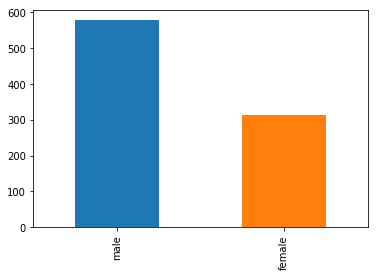

In [187]:
df.Sex.value_counts().plot(kind="bar")

In [188]:
df[df.Sex=="female"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S


In [189]:
df[df.Sex.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [190]:
df.Fare.value_counts()

8.0500      43
13.0000     42
7.8958      38
7.7500      34
26.0000     31
10.5000     24
7.9250      18
7.7750      16
26.5500     15
0.0000      15
7.2292      15
7.8542      13
8.6625      13
7.2500      13
7.2250      12
16.1000      9
9.5000       9
24.1500      8
15.5000      8
56.4958      7
52.0000      7
14.5000      7
14.4542      7
69.5500      7
7.0500       7
31.2750      7
46.9000      6
30.0000      6
7.7958       6
39.6875      6
            ..
7.1417       1
42.4000      1
211.5000     1
12.2750      1
61.1750      1
8.4333       1
51.4792      1
7.8875       1
8.6833       1
7.5208       1
34.6542      1
28.7125      1
25.5875      1
7.7292       1
12.2875      1
8.6542       1
8.7125       1
61.3792      1
6.9500       1
9.8417       1
8.3000       1
13.7917      1
9.4750       1
13.4167      1
26.3875      1
8.4583       1
9.8375       1
8.3625       1
14.1083      1
17.4000      1
Name: Fare, Length: 248, dtype: int64

In [191]:
df.describe() # for any continuous variable, describe

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


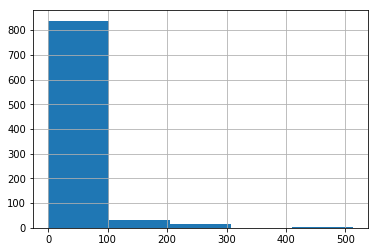

In [192]:
df.Fare.hist(bins=5)

In [193]:
df[df.Fare==0] # discover who has not paid any fare

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


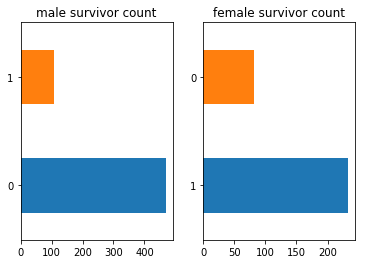

In [194]:
# women vs men survivor count

fig, axs = plt.subplots(1,2)
df[df.Sex=="male"].Survived.value_counts().plot(kind='barh',ax=axs[0], title="male survivor count")
df[df.Sex=="female"].Survived.value_counts().plot(kind='barh',ax=axs[1], title='female survivor count')

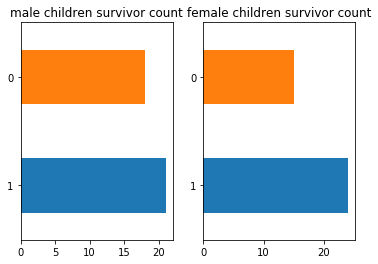

In [195]:
# female and male children survivor count
fig, axs = plt.subplots(1,2)
df[(df.Sex=="male") & (df.Age < 15)].Survived.value_counts().plot(kind='barh',
                                                                  ax=axs[0], title="male children survivor count")
df[(df.Sex=="female") & (df.Age < 15)].Survived.value_counts().plot(kind='barh',
                                                                    ax=axs[1], title='female children survivor count')

In [196]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

### Kernel Density Estimator

$$ \hat{f}^{Kernel} = \frac{1}{Nb} \sum_i^N (\frac{x_i - x}{b})$$
where 
<li> $K(\cdot)$ is the chosen Kernel (weight function)
<li> $b$ is the bandwidth (e.g. Silverman's bandwidth)

Text(0.5,1,'Poor Women Survived')

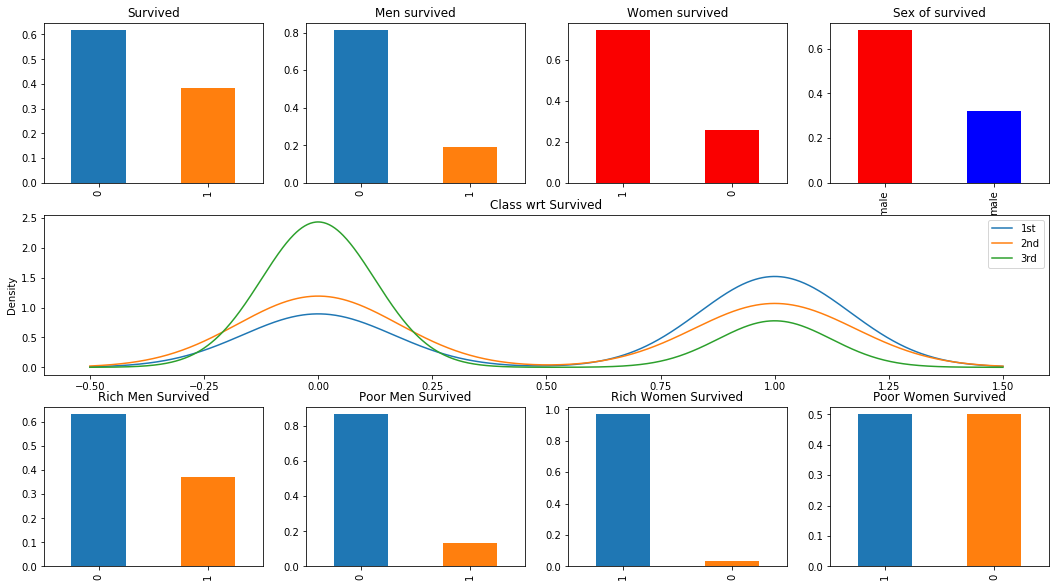

In [197]:
fig2 = plt.figure(figsize=(18, 10))

female_color = "#FA0000"

plt.subplot2grid((3, 4), (0, 0))
df.Survived.value_counts(normalize=True).plot(kind="bar")
plt.title("Survived")

plt.subplot2grid((3, 4), (0, 1))
df.Survived[df.Sex == "male"].value_counts(normalize=True).plot(kind="bar")
plt.title("Men survived")

plt.subplot2grid((3, 4), (0, 2))
df.Survived[df.Sex == "female"].value_counts(normalize=True).plot(kind="bar", color=female_color)
plt.title("Women survived")

plt.subplot2grid((3, 4), (0, 3))
df.Sex[df.Survived == 1].value_counts(normalize=True).plot(kind="bar", color=[female_color, 'b'])
plt.title("Sex of survived")

# kernel density estimation of passengers survived wrt passenger class
plt.subplot2grid((3, 4), (1,0), colspan=4)
for x in [1, 2, 3]:
    df.Survived[df.Pclass == x].plot(kind="kde")
plt.title("Class wrt Survived")
plt.legend(("1st", "2nd", "3rd"))

plt.subplot2grid((3, 4), (2, 0))
df.Survived[(df.Sex == "male") & (df.Pclass == 1)].value_counts(normalize=True).plot(kind="bar")
plt.title("Rich Men Survived")

plt.subplot2grid((3, 4), (2, 1))
df.Survived[(df.Sex == "male") & (df.Pclass == 3)].value_counts(normalize=True).plot(kind="bar")
plt.title("Poor Men Survived")

plt.subplot2grid((3, 4), (2, 2))
df.Survived[(df.Sex == "female") & (df.Pclass == 1)].value_counts(normalize=True).plot(kind="bar")
plt.title("Rich Women Survived")

plt.subplot2grid((3, 4), (2, 3))
df.Survived[(df.Sex == "female") & (df.Pclass == 3)].value_counts(normalize=True).plot(kind="bar")
plt.title("Poor Women Survived")

In [210]:
def process_data(data):
    
    # Fill missing values with median
    data['Age'] = data["Age"].fillna(data["Age"].dropna().median())
    data['Fare'] = data['Fare'].fillna(data['Fare'].dropna().median())
    data["Embarked"] = data["Embarked"].fillna("S")
    
    # Replace categorical values with numerical
    
    # replace age values: male: 0, female: 1
#     data.loc[data["Sex"] == 'male', 'Sex'] = 0
#     data.loc[data['Sex'] == 'female', 'Sex'] = 1
#     data['Sex'] = data['Sex'].map( {'female': 1, 'male': 0} )
    data['Sex'] = data['Sex'].apply(lambda s: 1 if s == 'male' else 0)
    
#     data.loc[data['Embarked'] == 'S', 'Embarked'] = 0
#     data.loc[data['Embarked'] == 'C', 'Embarked'] = 1
#     data.loc[data['Embarked'] == 'Q', 'Embarked'] = 2
    embarked_mapping = {"S": 0, "C": 1, "Q": 2}
    data['Embarked'] = data['Embarked'].map(embarked_mapping)
    
#     title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
#     data['Title'] = data['Title'].map(title_mapping)
#     data['Title'] = data['Title'].fillna(0)
    
    # Mapping Fare
    data.loc[ data['Fare'] <= 7.91, 'Fare']         = 0
    data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare'] = 1
    data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare']   = 2
    data.loc[ data['Fare'] > 31, 'Fare']        = 3
    data['Fare'] = data['Fare'].astype(int)
    
    
    data = data.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)
    
    return data

In [211]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier

from sklearn.metrics import log_loss, accuracy_score

import seaborn as sns

classifiers = [LogisticRegression(), KNeighborsClassifier(n_neighbors=3), GaussianNB(), 
               DecisionTreeClassifier(criterion='entropy'), RandomForestClassifier(n_estimators=100)]

# train = process_data(df)

# target = train.Survived.values
# features_names = ['Sex', 'Age','Pclass', 'Fare']#, 'Embarked']
# features = train[features_names].values
# print(features)

# _classifier = classifiers[4]
# # print(_classifier)
# # _score = _classifier.fit(features, target).score(features, target)
# #
# print(_score)

In [212]:
test_df = pd.read_csv('test.csv')

print(test_df.head())

train_df = process_data(df)
X_test = process_data(test_df)

X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
# X_test  = test_df.drop(["PassengerId"], axis=1).copy()
print(X_train.shape, Y_train.shape, X_test.shape)
# test_df = process_data(test_df)

# X_test = test_df.drop("PassengerId", axis=1).copy()

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

# random_forest = RandomForestClassifier(n_estimators=100)
# random_forest.fit(features, target)
# Y_pred = random_forest.predict(X_test)

submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submission.csv', index=False)

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
(891, 7) (891,) (418, 7)
